# Modeling - Light Gradient Boosting Machine

In [1]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb

In [2]:
df_train = pd.read_pickle(r"feature_engineering_train_dataset.pkl")
df_valid = pd.read_pickle(r"feature_engineering_validation_dataset.pkl")

## CO(GT)

In [3]:
feature_cols = 'COGT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols]

In [4]:
display(X_train.head(3))
display(X_valid.head(3))

,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,1080.0,5.9,122.0,1254.0,97.0,1375.0,816.0,8.3,58.5,0.6438,...,0,0,0,0,0,0,0,0,1,0
1,1044.0,6.4,133.0,1247.0,110.0,1378.0,832.0,7.7,59.7,0.6308,...,0,0,0,0,0,0,0,0,1,0
2,988.0,4.1,82.0,1396.0,91.0,1304.0,692.0,7.1,61.8,0.6276,...,0,0,0,0,0,0,0,0,1,0


,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,1122.0,10.5,259.0,660.0,62.0,1586.0,1048.0,18.4,76.3,1.6017,...,0,0,0,0,0,1,0,0,0,0
1,983.0,7.6,227.0,752.0,56.0,1472.0,928.0,18.2,76.4,1.5787,...,0,0,0,0,0,1,0,0,0,0
2,885.0,4.8,147.0,878.0,49.0,1374.0,813.0,17.9,74.8,1.5219,...,0,0,0,0,0,1,0,0,0,0


In [5]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [6]:
model = lgb.LGBMRegressor(n_estimators=1000
                          ,learning_rate=0.01
                          ,n_jobs=-1
                          )

model.fit(X_train, y_train
          ,eval_set=[(X_valid, y_valid)]
          ,eval_metric='rmse'
          )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149882
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 641
[LightGBM] [Info] Start training from score 1.968625


LGBMRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1)

In [7]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))

Train MAE    : 0.0708
Train RMSE   : 0.1038


In [8]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 0.4346
Validation RMSE  : 0.7068


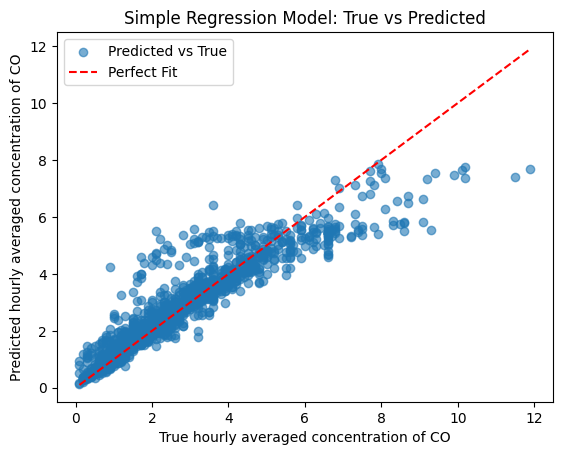

In [9]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of CO")
plt.ylabel("Predicted hourly averaged concentration of CO")
plt.legend()
plt.show()

## C6H6(GT)

In [10]:
feature_cols = 'C6H6GT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols]

In [11]:
display(X_train.head(3))
display(X_valid.head(3))

,COGT,PT08.S1CO,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,1.7,1080.0,122.0,1254.0,97.0,1375.0,816.0,8.3,58.5,0.6438,...,0,0,0,0,0,0,0,0,1,0
1,1.9,1044.0,133.0,1247.0,110.0,1378.0,832.0,7.7,59.7,0.6308,...,0,0,0,0,0,0,0,0,1,0
2,1.4,988.0,82.0,1396.0,91.0,1304.0,692.0,7.1,61.8,0.6276,...,0,0,0,0,0,0,0,0,1,0


,COGT,PT08.S1CO,NOxGT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,2.3,1122.0,259.0,660.0,62.0,1586.0,1048.0,18.4,76.3,1.6017,...,0,0,0,0,0,1,0,0,0,0
1,1.6,983.0,227.0,752.0,56.0,1472.0,928.0,18.2,76.4,1.5787,...,0,0,0,0,0,1,0,0,0,0
2,1.1,885.0,147.0,878.0,49.0,1374.0,813.0,17.9,74.8,1.5219,...,0,0,0,0,0,1,0,0,0,0


In [12]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [13]:
model = lgb.LGBMRegressor(n_estimators=1000
                          ,learning_rate=0.01
                          ,n_jobs=-1
                          )

model.fit(X_train, y_train
          ,eval_set=[(X_valid, y_valid)]
          ,eval_metric='rmse'
          )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149701
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 641
[LightGBM] [Info] Start training from score 10.521368


LGBMRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1)

In [14]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))

Train MAE    : 0.2854
Train RMSE   : 0.3887


In [15]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 2.0502
Validation RMSE  : 3.1705


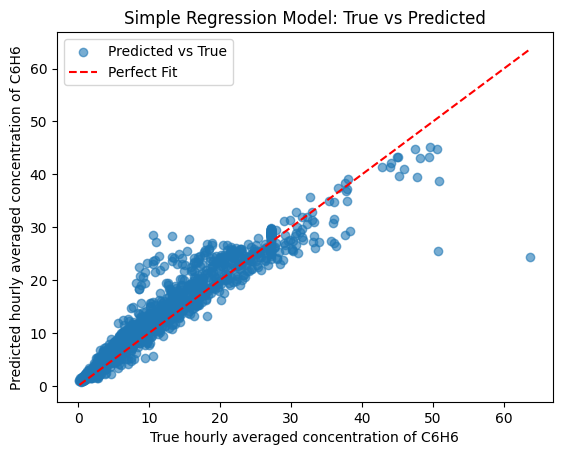

In [16]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of C6H6")
plt.ylabel("Predicted hourly averaged concentration of C6H6")
plt.legend()
plt.show()

## NOx(GT)

In [17]:
feature_cols = 'NOxGT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols]

In [18]:
display(X_train.head(3))
display(X_valid.head(3))

,COGT,PT08.S1CO,C6H6GT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,1.7,1080.0,5.9,1254.0,97.0,1375.0,816.0,8.3,58.5,0.6438,...,0,0,0,0,0,0,0,0,1,0
1,1.9,1044.0,6.4,1247.0,110.0,1378.0,832.0,7.7,59.7,0.6308,...,0,0,0,0,0,0,0,0,1,0
2,1.4,988.0,4.1,1396.0,91.0,1304.0,692.0,7.1,61.8,0.6276,...,0,0,0,0,0,0,0,0,1,0


,COGT,PT08.S1CO,C6H6GT,PT08.S3NOx,NO2GT,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,2.3,1122.0,10.5,660.0,62.0,1586.0,1048.0,18.4,76.3,1.6017,...,0,0,0,0,0,1,0,0,0,0
1,1.6,983.0,7.6,752.0,56.0,1472.0,928.0,18.2,76.4,1.5787,...,0,0,0,0,0,1,0,0,0,0
2,1.1,885.0,4.8,878.0,49.0,1374.0,813.0,17.9,74.8,1.5219,...,0,0,0,0,0,1,0,0,0,0


In [19]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [20]:
model = lgb.LGBMRegressor(n_estimators=1000
                          ,learning_rate=0.01
                          ,n_jobs=-1
                          )

model.fit(X_train, y_train
          ,eval_set=[(X_valid, y_valid)]
          ,eval_metric='rmse'
          )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149701
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 641
[LightGBM] [Info] Start training from score 168.931980


LGBMRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1)

In [21]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))

Train MAE    : 5.9849
Train RMSE   : 8.9617


In [22]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 72.741
Validation RMSE  : 123.2233


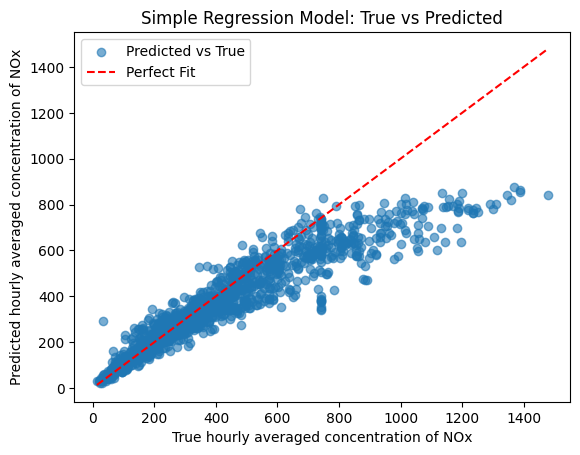

In [23]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of NOx")
plt.ylabel("Predicted hourly averaged concentration of NOx")
plt.legend()
plt.show()

## NO2(GT)

In [24]:
feature_cols = 'NO2GT'
X_train = df_train.drop(columns = {"date_time",feature_cols})
y_train = df_train[feature_cols] 

X_valid = df_valid.drop(columns = {"date_time",feature_cols})
y_valid = df_valid[feature_cols]

In [25]:
display(X_train.head(3))
display(X_valid.head(3))

,COGT,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,1.7,1080.0,5.9,122.0,1254.0,1375.0,816.0,8.3,58.5,0.6438,...,0,0,0,0,0,0,0,0,1,0
1,1.9,1044.0,6.4,133.0,1247.0,1378.0,832.0,7.7,59.7,0.6308,...,0,0,0,0,0,0,0,0,1,0
2,1.4,988.0,4.1,82.0,1396.0,1304.0,692.0,7.1,61.8,0.6276,...,0,0,0,0,0,0,0,0,1,0


,COGT,PT08.S1CO,C6H6GT,NOxGT,PT08.S3NOx,PT08.S4NO2,PT08.S5O3,T,RH,AH,...,hour_20,hour_21,hour_22,hour_23,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Friday,day_of_week_Saturday
0,2.3,1122.0,10.5,259.0,660.0,1586.0,1048.0,18.4,76.3,1.6017,...,0,0,0,0,0,1,0,0,0,0
1,1.6,983.0,7.6,227.0,752.0,1472.0,928.0,18.2,76.4,1.5787,...,0,0,0,0,0,1,0,0,0,0
2,1.1,885.0,4.8,147.0,878.0,1374.0,813.0,17.9,74.8,1.5219,...,0,0,0,0,0,1,0,0,0,0


In [26]:
print("Train shape:", X_train.shape)
print("Valid shape:", X_valid.shape)

Train shape: (5616, 641)
Valid shape: (1440, 641)


In [27]:
model = lgb.LGBMRegressor(n_estimators=1000
                          ,learning_rate=0.01
                          ,n_jobs=-1
                          )

model.fit(X_train, y_train
          ,eval_set=[(X_valid, y_valid)]
          ,eval_metric='rmse'
          )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149768
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 641
[LightGBM] [Info] Start training from score 93.439637


LGBMRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1)

In [28]:
train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE    :", round(mae_train,4))
print("Train RMSE   :", round(rmse_train,4))

Train MAE    : 2.4317
Train RMSE   : 3.4118


In [29]:
y_pred = model.predict(X_valid)
mae_validation = mean_absolute_error(y_valid, y_pred)
rmse_validation = np.sqrt(mean_squared_error(y_valid, y_pred))

print("Validation MAE   :", round(mae_validation,4))
print("Validation RMSE  :", round(rmse_validation,4))

Validation MAE   : 11.2456
Validation RMSE  : 17.9303


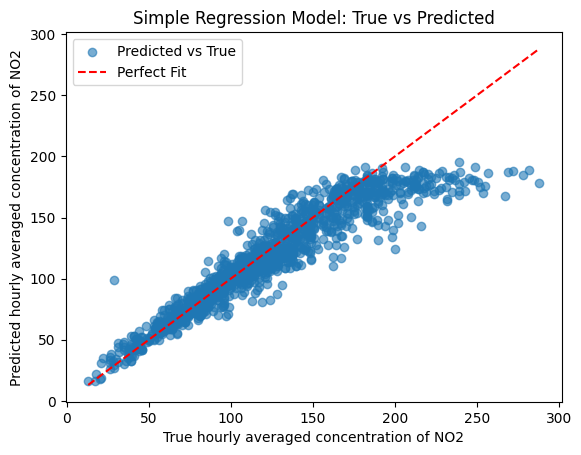

In [30]:
# Scatter plot: True vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', label="Perfect Fit")
plt.title("Simple Regression Model: True vs Predicted")
plt.xlabel("True hourly averaged concentration of NO2")
plt.ylabel("Predicted hourly averaged concentration of NO2")
plt.legend()
plt.show()